# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
import json
from datetime import datetime
from scipy.stats import linregress
from pathlib import Path

cities_csv_to_load = Path(r"C:\Users\Kels\.vscode\python-api-challenge-1\output_data\cities.csv")
cities_csv = pd.read_csv(cities_csv_to_load)

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
      
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response_json = requests.get(query_url + city).json()
        
       # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response_json["coord"]["lat"]
        city_lng = response_json["coord"]["lon"]
        city_max_temp = response_json["main"]["temp_max"]
        city_humidity = response_json ["main"]["humidity"]
        city_clouds = response_json["clouds"]["all"]
        city_wind = response_json["wind"]["speed"]
        city_country = response_json["sys"]["country"]
        city_date = response_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | palikir - national government center
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | mazagao
Processing Record 6 of Set 1 | mawu
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | egilsstadir
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | ciudad real
Processing Record 17 of Set 1 | wuwei
Processing Record 18 of Set 1 | chicxulub puerto
City not found. Skipping...
Processing Record 19 of Set 1 | port lincoln
Processing Record 20 of Set 1 | port-aux-francais
Processing Re

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,69.85,66,4,14.45,PN,1686778217
1,palikir - national government center,6.9248,158.1611,81.34,83,100,9.22,FM,1686778218
2,tiksi,71.6872,128.8694,36.01,76,100,6.67,RU,1686778218
3,mazagao,-0.1150,-51.2894,86.05,85,8,4.09,BR,1686778218
4,mawu,29.5923,107.3139,64.35,96,100,2.21,CN,1686778218


In [9]:
# Export the City_Data into a csv
Path("output_data").mkdir(parents=True, exist_ok=True)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,69.85,66,4,14.45,PN,1686778217
1,palikir - national government center,6.9248,158.1611,81.34,83,100,9.22,FM,1686778218
2,tiksi,71.6872,128.8694,36.01,76,100,6.67,RU,1686778218
3,mazagao,-0.1150,-51.2894,86.05,85,8,4.09,BR,1686778218
4,mawu,29.5923,107.3139,64.35,96,100,2.21,CN,1686778218


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

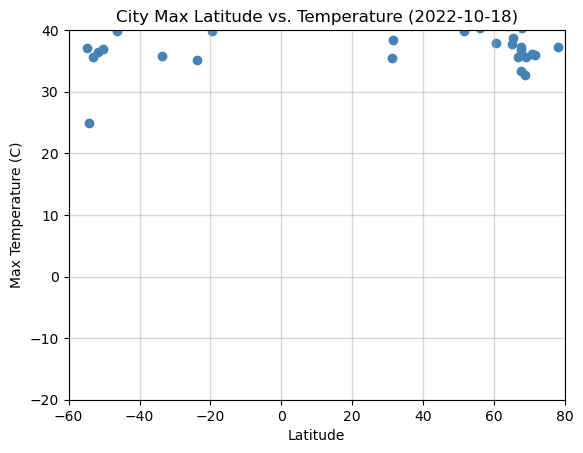

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue")
            
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.ylim(-20, 40)
plt.xlim(-60, 80)
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

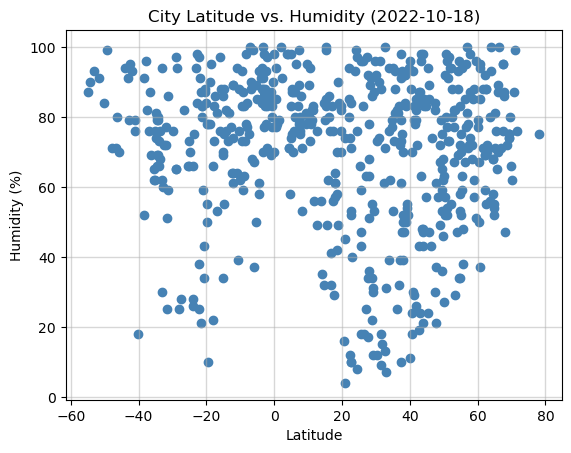

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

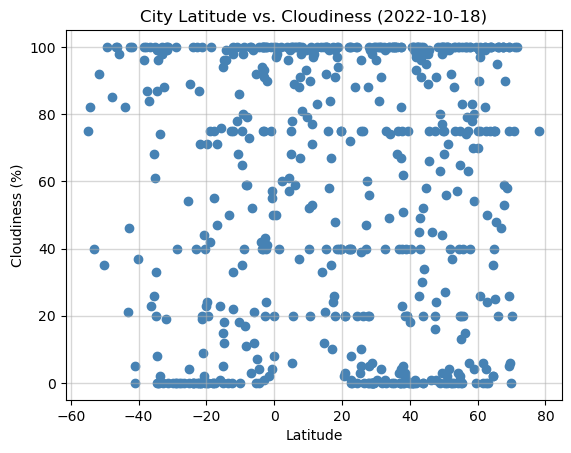

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

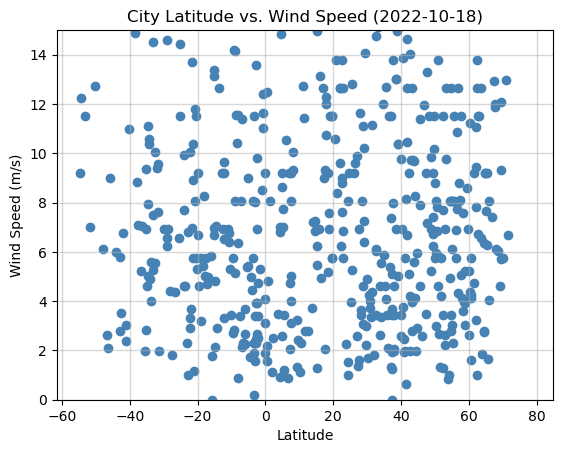

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.ylim(0,15)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    print(f"The r-squared is: {round(st.pearsonr(x, y)[0], 2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
mask = city_data_df['Lat'] > 0
northern_hemi_df = city_data_df[mask]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,palikir - national government center,6.9248,158.1611,81.34,83,100,9.22,FM,1686778218
2,tiksi,71.6872,128.8694,36.01,76,100,6.67,RU,1686778218
4,mawu,29.5923,107.3139,64.35,96,100,2.21,CN,1686778218
6,egilsstadir,65.2653,-14.3948,53.51,71,75,9.22,IS,1686778219
10,iqaluit,63.7506,-68.5145,40.73,56,75,12.66,CA,1686778169


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
mask = city_data_df['Lat'] < 0
southern_hemi_df = city_data_df[mask]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,69.85,66,4,14.45,PN,1686778217
3,mazagao,-0.1150,-51.2894,86.05,85,8,4.09,BR,1686778218
5,puerto natales,-51.7236,-72.4875,36.52,91,92,7.02,CL,1686777933
7,waitangi,-43.9535,-176.5597,52.83,94,82,5.99,NZ,1686778219
8,port mathurin,-19.6833,63.4167,76.21,78,24,20.83,MU,1686778219


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.583621054507435


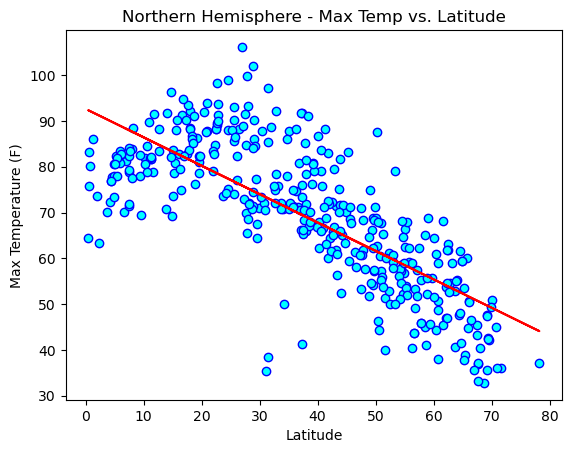

In [19]:
# Linear regression on Northern Hemisphere
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")



The r-value is: 0.6718497459753935


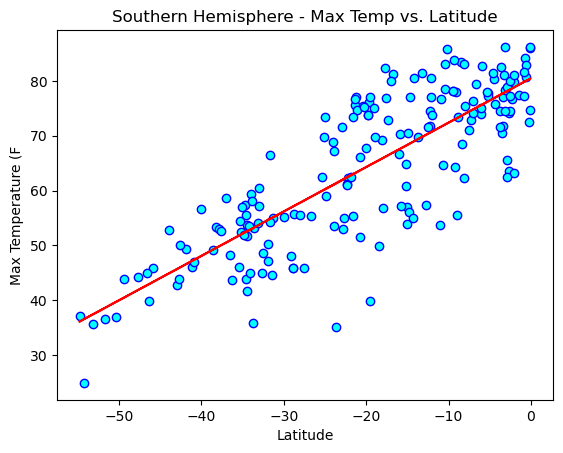

In [20]:
# Linear regression on Southern Hemisphere
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F')
plt.annotate(line_eq,(-55,93),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")


**Discussion about the linear relationship:** 
The northern hemisphere regression displays a negative correlation: as you move away from the equator the temperature decreases.
While the southern hemisphere regression displays a positive correlation: as you get closer to the equator the temperature increases.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00012453691613215277


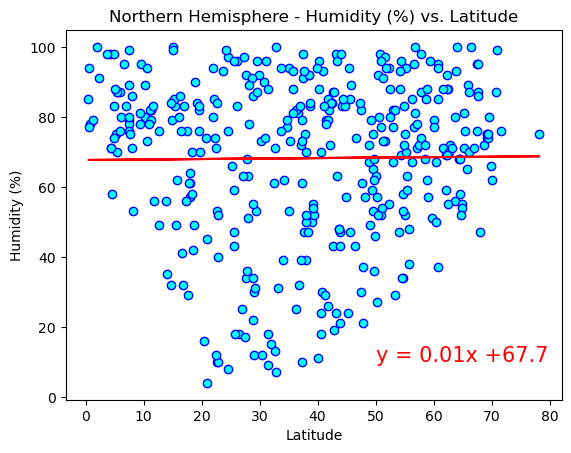

In [21]:
# Northern Hemisphere
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")


The r-value is: 0.012159153035938257


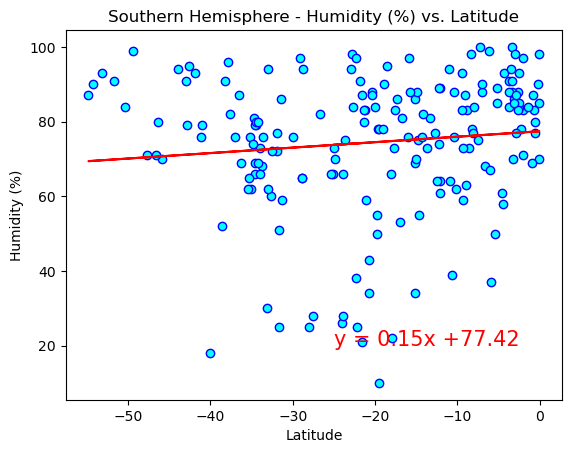

In [22]:
# Southern Hemisphere
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:
There is a slight positive correlation between humidity and latitude for cities in the northern hemisphere but there is very little correlation between humidity and latitude for cities in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.006916952388667015


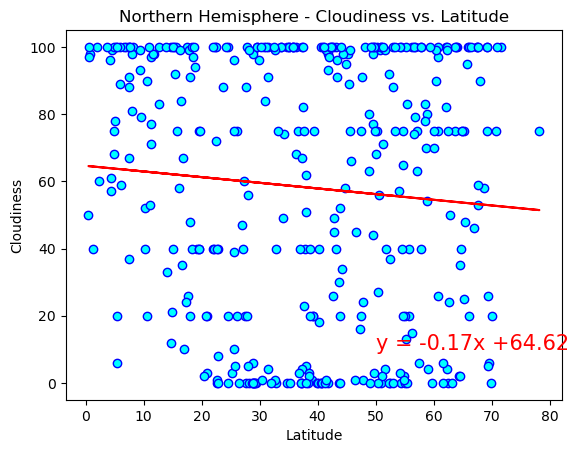

In [23]:
# Northern Hemisphere
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")


The r-value is: 0.003638869010429159


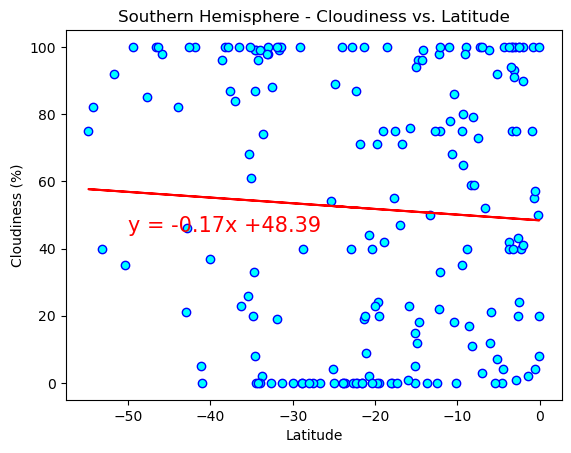

In [24]:
# Southern Hemisphere
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")



**Discussion about the linear relationship:**
There is a positive correlation between cloudiness and latitude for cities in the northern hemisphere while there is minimal correlation between cloudiness and latitude for cities in the southern hemisphere.



### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 4.2896733027681026e-05


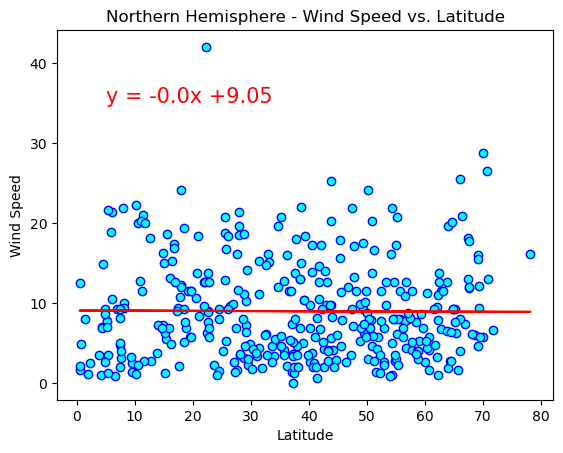

In [25]:
# Northern Hemisphere
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")


The r-value is: 0.03608548331311727


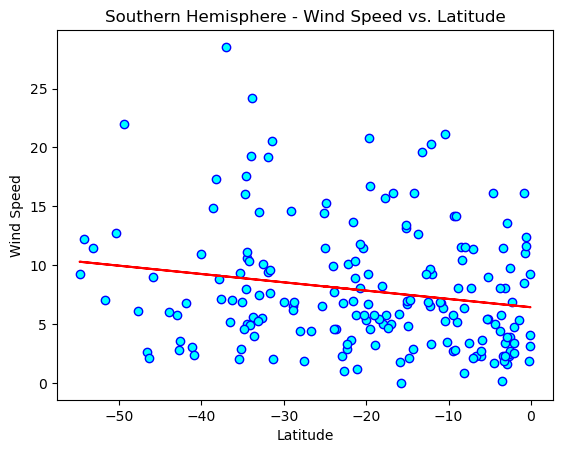

In [26]:
# Southern Hemisphere
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

**Discussion about the linear relationship:** 
There is very little correlation between wind speed and latitude for cities in the northern hemisphere while there is only a slightly negative correlation between wind speed and latitude for cities in the southern hemisphere.
